In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn import metrics
%matplotlib inline
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Part3 - vehicle.csv')
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [3]:
df.shape

(846, 19)

In [4]:
df.isnull().any()

compactness                    False
circularity                     True
distance_circularity            True
radius_ratio                    True
pr.axis_aspect_ratio            True
max.length_aspect_ratio        False
scatter_ratio                   True
elongatedness                   True
pr.axis_rectangularity          True
max.length_rectangularity      False
scaled_variance                 True
scaled_variance.1               True
scaled_radius_of_gyration       True
scaled_radius_of_gyration.1     True
skewness_about                  True
skewness_about.1                True
skewness_about.2                True
hollows_ratio                  False
class                          False
dtype: bool

#### So most of the features have null values. We will replace them with median.

In [17]:
from sklearn.impute import SimpleImputer
dfnew = df[['circularity','distance_circularity','radius_ratio','pr.axis_aspect_ratio','scatter_ratio','elongatedness','pr.axis_rectangularity','scaled_variance','scaled_variance.1','scaled_radius_of_gyration','scaled_radius_of_gyration.1','skewness_about','skewness_about.1','skewness_about.2']]
rep_0 = SimpleImputer(missing_values=np.nan, strategy="median")
cols=dfnew.columns
dfnew = pd.DataFrame(rep_0.fit_transform(dfnew))

In [23]:
dfnew.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,48.0,83.0,178.0,72.0,162.0,42.0,20.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0
1,41.0,84.0,141.0,57.0,149.0,45.0,19.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0
2,50.0,106.0,209.0,66.0,207.0,32.0,23.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0
3,41.0,82.0,159.0,63.0,144.0,46.0,19.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0
4,44.0,70.0,205.0,103.0,149.0,45.0,19.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0


In [24]:
df['circularity'] = dfnew[0]
df['distance_circularity'] = dfnew[1]
df['radius_ratio'] = dfnew[2]
df['pr.axis_aspect_ratio'] = dfnew[3]
df['scatter_ratio'] = dfnew[4]
df['elongatedness'] = dfnew[5]
df['pr.axis_rectangularity'] = dfnew[6]
df['scaled_variance'] = dfnew[7]
df['scaled_variance.1'] = dfnew[8]
df['scaled_radius_of_gyration'] = dfnew[9]
df['scaled_radius_of_gyration.1'] = dfnew[10]
df['skewness_about'] = dfnew[11]
df['skewness_about.1'] = dfnew[12]
df['skewness_about.2'] = dfnew[13]

In [25]:
df.isnull().any()

compactness                    False
circularity                    False
distance_circularity           False
radius_ratio                   False
pr.axis_aspect_ratio           False
max.length_aspect_ratio        False
scatter_ratio                  False
elongatedness                  False
pr.axis_rectangularity         False
max.length_rectangularity      False
scaled_variance                False
scaled_variance.1              False
scaled_radius_of_gyration      False
scaled_radius_of_gyration.1    False
skewness_about                 False
skewness_about.1               False
skewness_about.2               False
hollows_ratio                  False
class                          False
dtype: bool

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.00,119.0
circularity,846.0,44.823877,6.134272,33.0,40.00,44.0,49.00,59.0
distance_circularity,846.0,82.100473,15.741569,40.0,70.00,80.0,98.00,112.0
radius_ratio,846.0,168.874704,33.401356,104.0,141.00,167.0,195.00,333.0
pr.axis_aspect_ratio,846.0,61.677305,7.882188,47.0,57.00,61.0,65.00,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.00,55.0
scatter_ratio,846.0,168.887707,33.197710,112.0,147.00,157.0,198.00,265.0
elongatedness,846.0,40.936170,7.811882,26.0,33.00,43.0,46.00,61.0
pr.axis_rectangularity,846.0,20.580378,2.588558,17.0,19.00,20.0,23.00,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.00,188.0


mean of compactness and 50% of compactness are almost same. It seems normal distribution.
Similarly for circularity, distance_circularity, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about.2 and hollows_ratio seems to have normal distribution. Other features might have right sckewed distribution wtih some outliers.

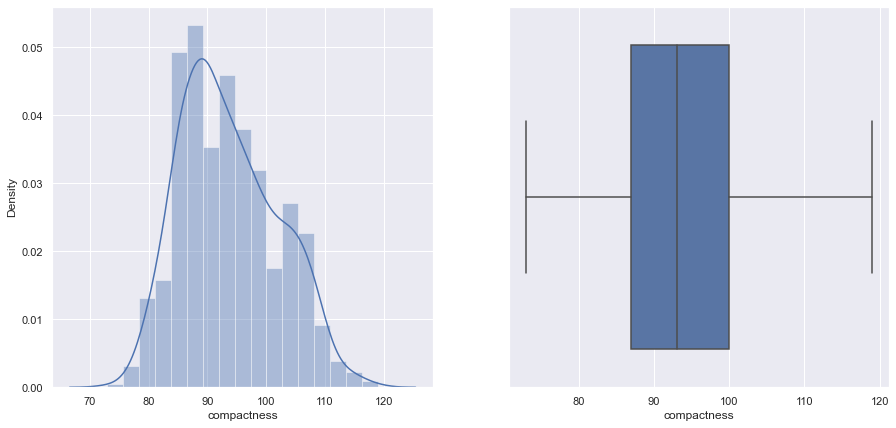

In [30]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'compactness', data=df , ax=axes[1])
sns.distplot(df['compactness'],  ax=axes[0])
plt.show()

compactness has normal distribution without outliers.

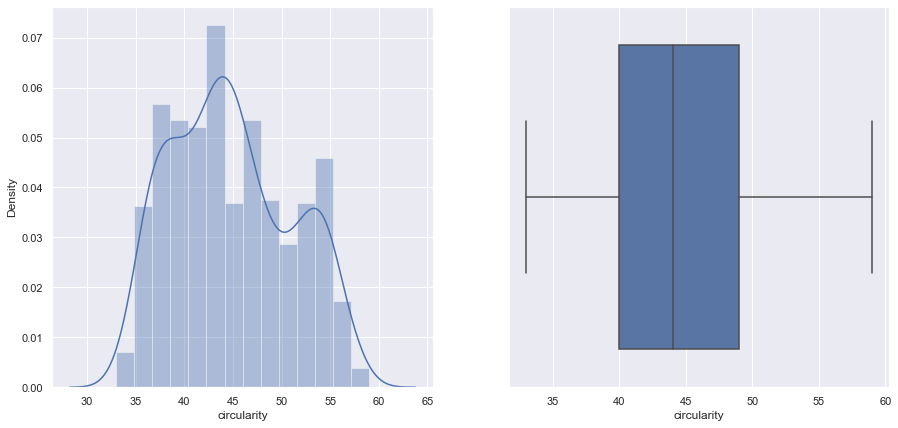

In [32]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'circularity', data=df , ax=axes[1])
sns.distplot(df['circularity'],  ax=axes[0])
plt.show()

circularity also has normal distribution without outliers.

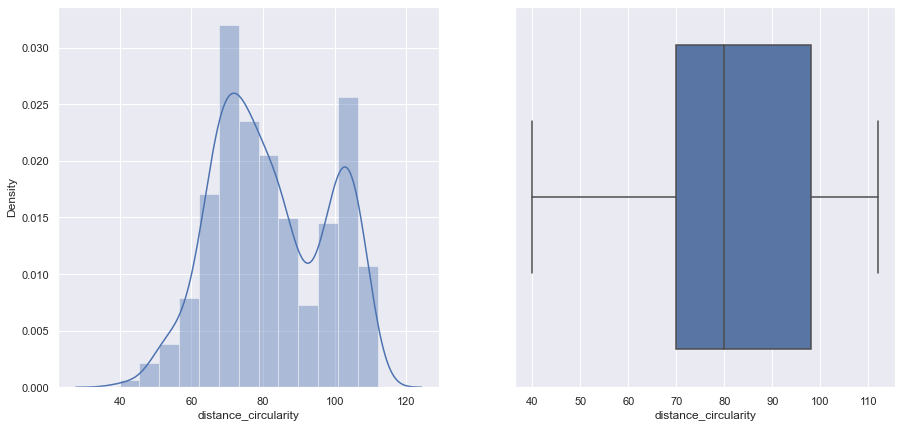

In [33]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'distance_circularity', data=df , ax=axes[1])
sns.distplot(df['distance_circularity'],  ax=axes[0])
plt.show()

distance_circularity has normal distributions with two bell curves.

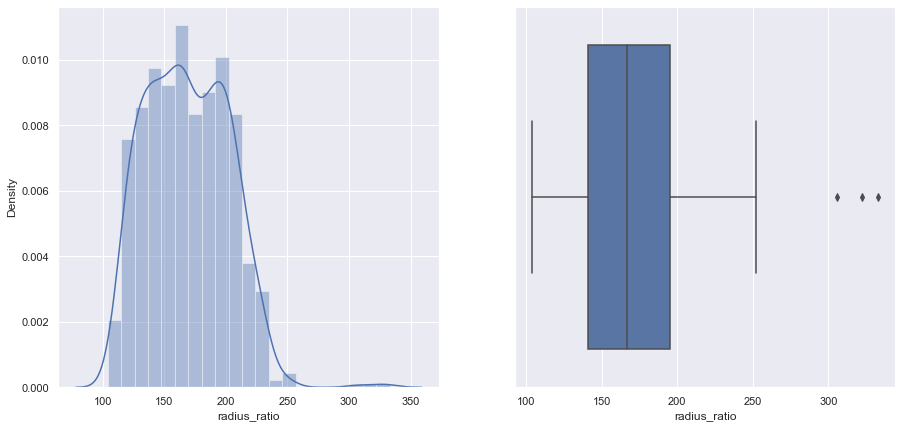

In [34]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'radius_ratio', data=df , ax=axes[1])
sns.distplot(df['radius_ratio'],  ax=axes[0])
plt.show()

It seems radius_ratio has 3 outliers which makes its distribution is slightly right sckewed.

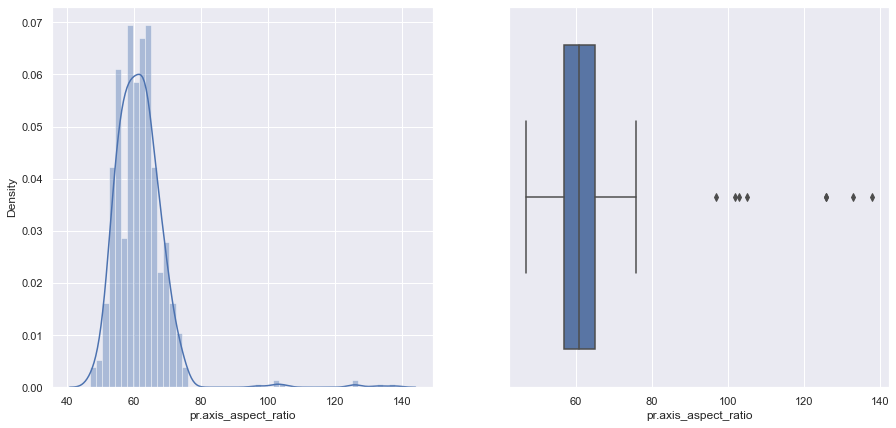

In [35]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'pr.axis_aspect_ratio', data=df , ax=axes[1])
sns.distplot(df['pr.axis_aspect_ratio'],  ax=axes[0])
plt.show()

pr.axis_aspect_ratio has multiple outliers with right sckewed distribution.

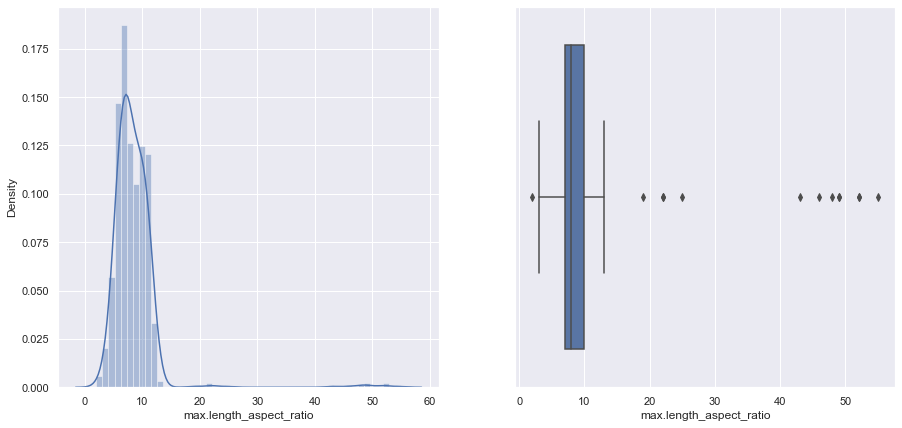

In [36]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'max.length_aspect_ratio', data=df , ax=axes[1])
sns.distplot(df['max.length_aspect_ratio'],  ax=axes[0])
plt.show()

max.length_aspect_ratio	also has multiple outliers with right sckewed distribution.

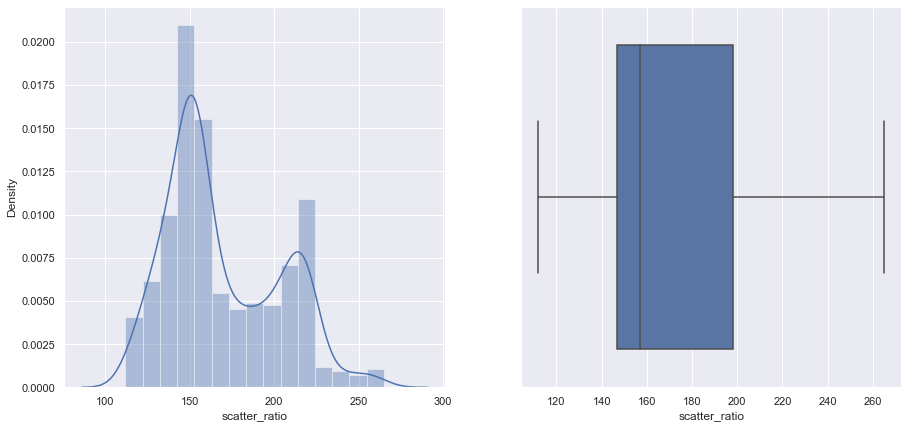

In [37]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'scatter_ratio', data=df , ax=axes[1])
sns.distplot(df['scatter_ratio'],  ax=axes[0])
plt.show()

scatter_ratio has normal distribution with 2 bell curves without any outliers.

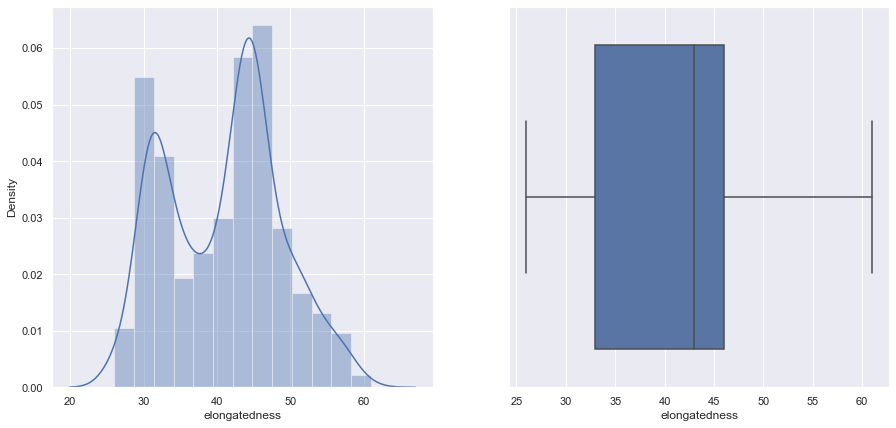

In [38]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'elongatedness', data=df , ax=axes[1])
sns.distplot(df['elongatedness'],  ax=axes[0])
plt.show()

elongatedness also has normal distribution with 2 bell curves without any outliers.

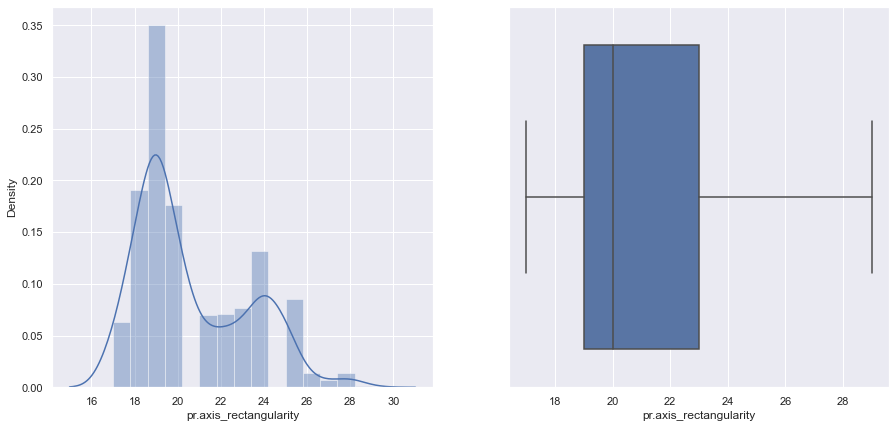

In [40]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'pr.axis_rectangularity', data=df , ax=axes[1])
sns.distplot(df['pr.axis_rectangularity'],  ax=axes[0])
plt.show()

pr.axis_rectangularity has no outliers and seems fairly distributed.

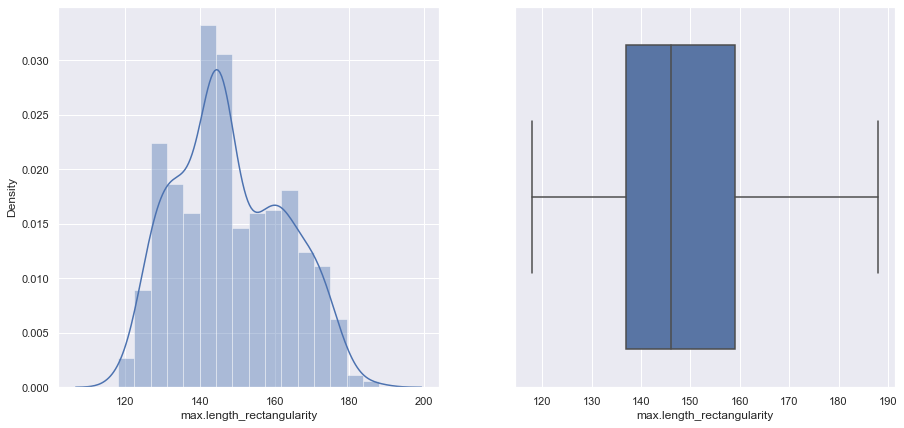

In [41]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'max.length_rectangularity', data=df , ax=axes[1])
sns.distplot(df['max.length_rectangularity'],  ax=axes[0])
plt.show()

max.length_rectangularity is normally distributed without outliers.

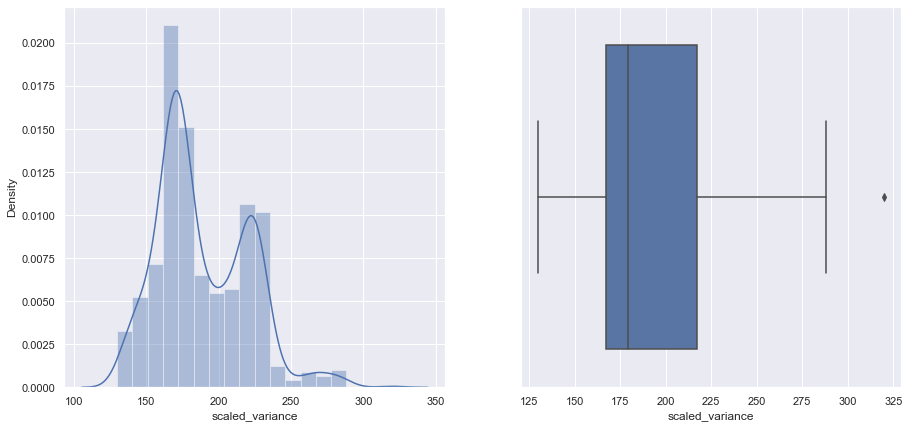

In [43]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'scaled_variance', data=df , ax=axes[1])
sns.distplot(df['scaled_variance'],  ax=axes[0])
plt.show()

scaled_variance has one outlier which makes this distribution slightly right sckewed.

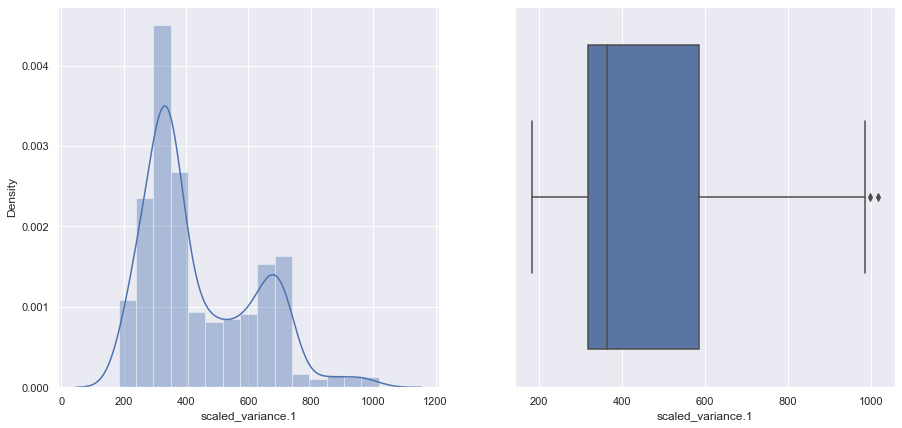

In [44]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'scaled_variance.1', data=df , ax=axes[1])
sns.distplot(df['scaled_variance.1'],  ax=axes[0])
plt.show()

scaled_variance.1 has 2 outliers with right sckewed distribution.

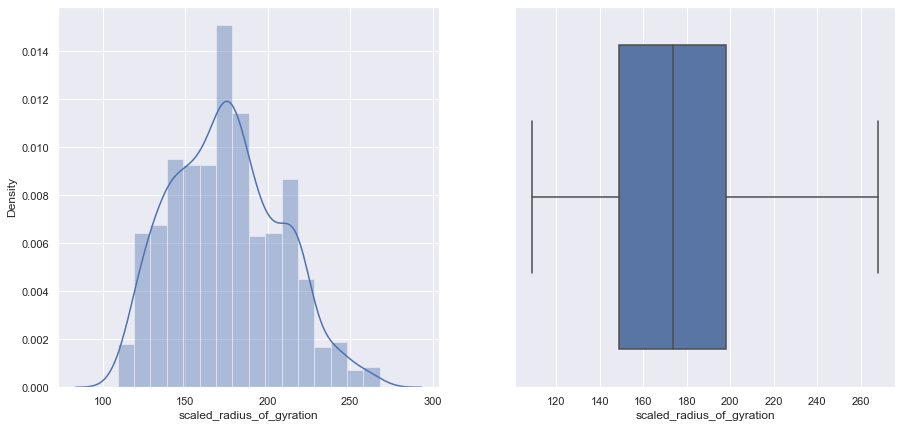

In [45]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'scaled_radius_of_gyration', data=df , ax=axes[1])
sns.distplot(df['scaled_radius_of_gyration'],  ax=axes[0])
plt.show()

scaled_radius_of_gyration has normal distribution without outliers.

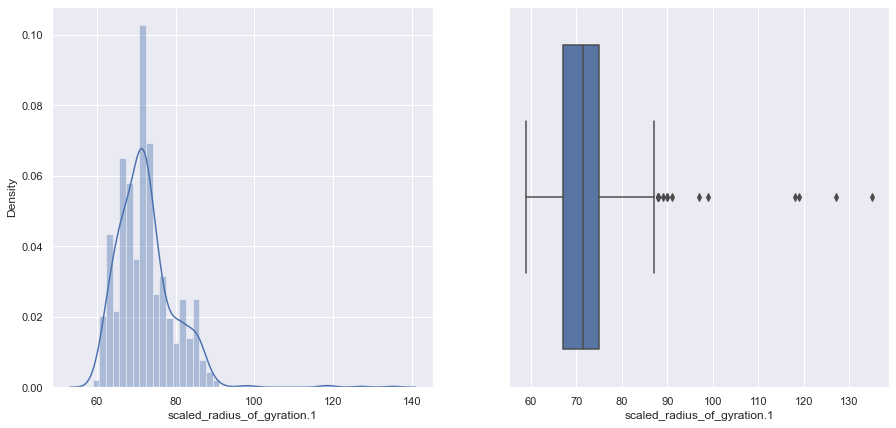

In [47]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'scaled_radius_of_gyration.1', data=df , ax=axes[1])
sns.distplot(df['scaled_radius_of_gyration.1'],  ax=axes[0])
plt.show()

scaled_radius_of_gyration.1 has multiple outliers and right sckewed distribution.

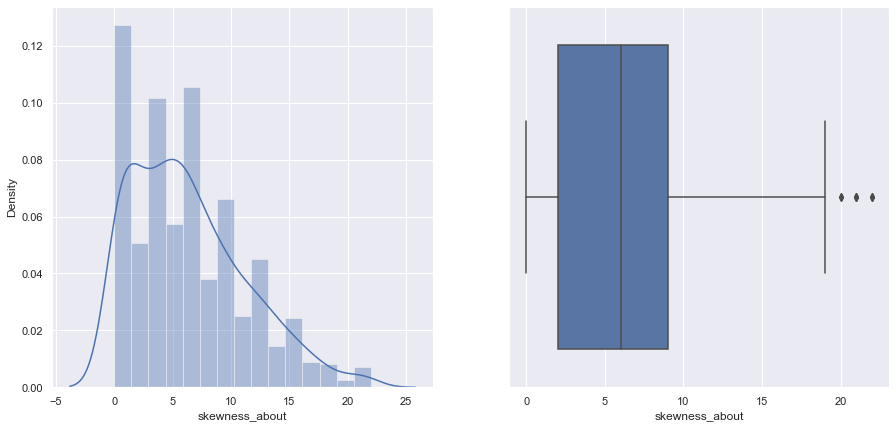

In [48]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'skewness_about', data=df , ax=axes[1])
sns.distplot(df['skewness_about'],  ax=axes[0])
plt.show()

skewness_about has 3 outliers and slight right sckewed distributions.

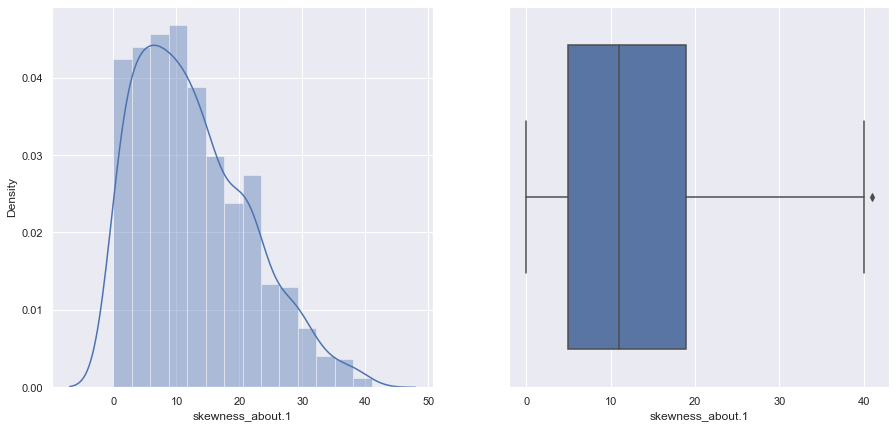

In [49]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'skewness_about.1', data=df , ax=axes[1])
sns.distplot(df['skewness_about.1'],  ax=axes[0])
plt.show()

skewness_about.1 has one outlier with slight right sckewed distribution.

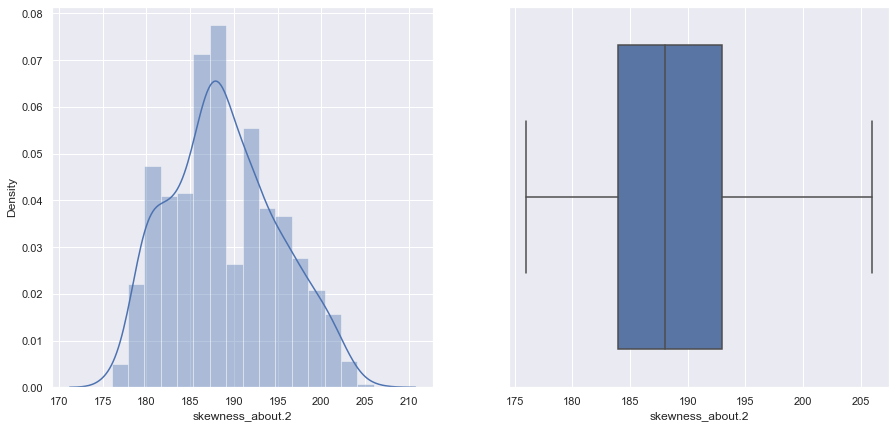

In [50]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'skewness_about.2', data=df , ax=axes[1])
sns.distplot(df['skewness_about.2'],  ax=axes[0])
plt.show()

skewness_about.2 has normal distribution.

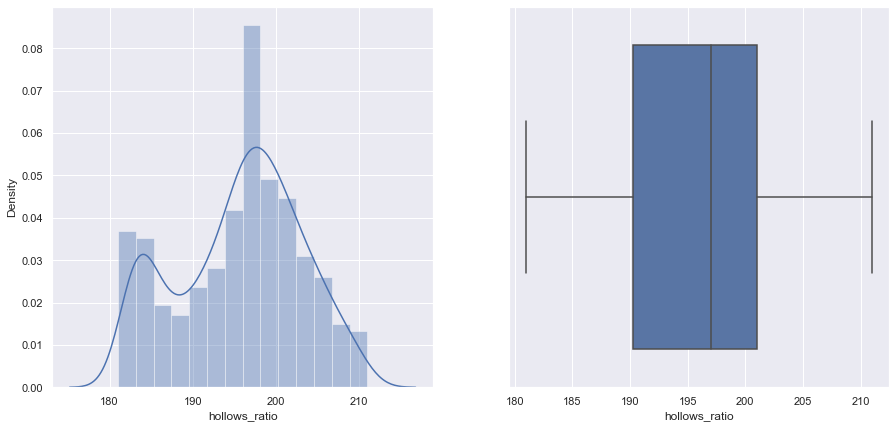

In [52]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'hollows_ratio', data=df , ax=axes[1])
sns.distplot(df['hollows_ratio'],  ax=axes[0])
plt.show()

hollows_ratio is also normally distributed without outliers.

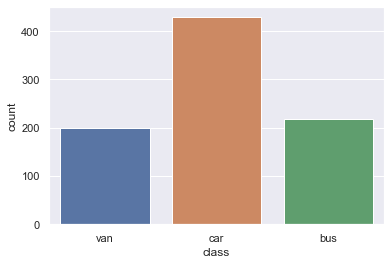

In [53]:
sns.countplot('class',data=df)
plt.show()

car has more than double distribution to bus and van class.

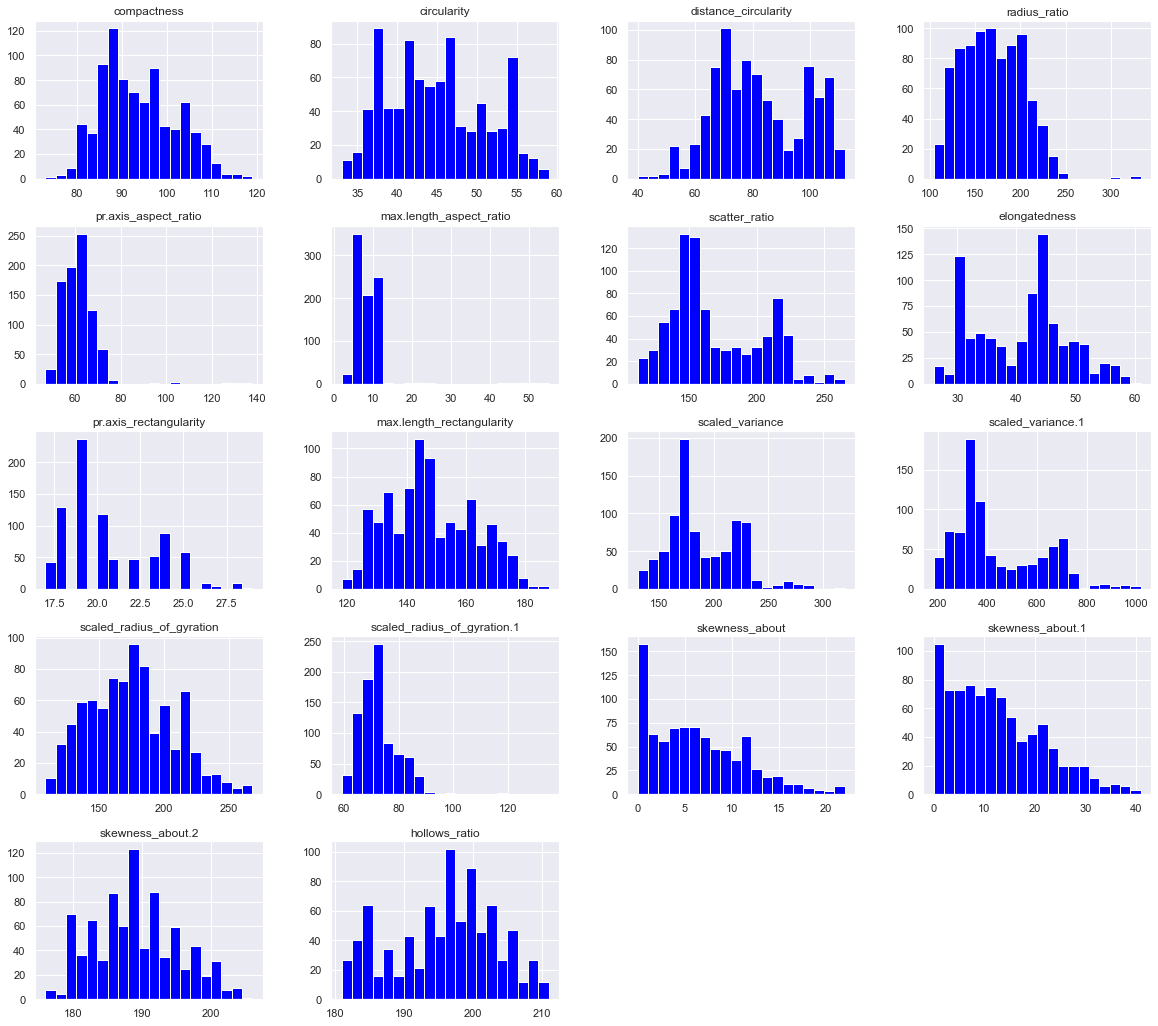

In [54]:
df.hist(bins = 20, figsize = (20, 18), color = 'blue')
plt.show()

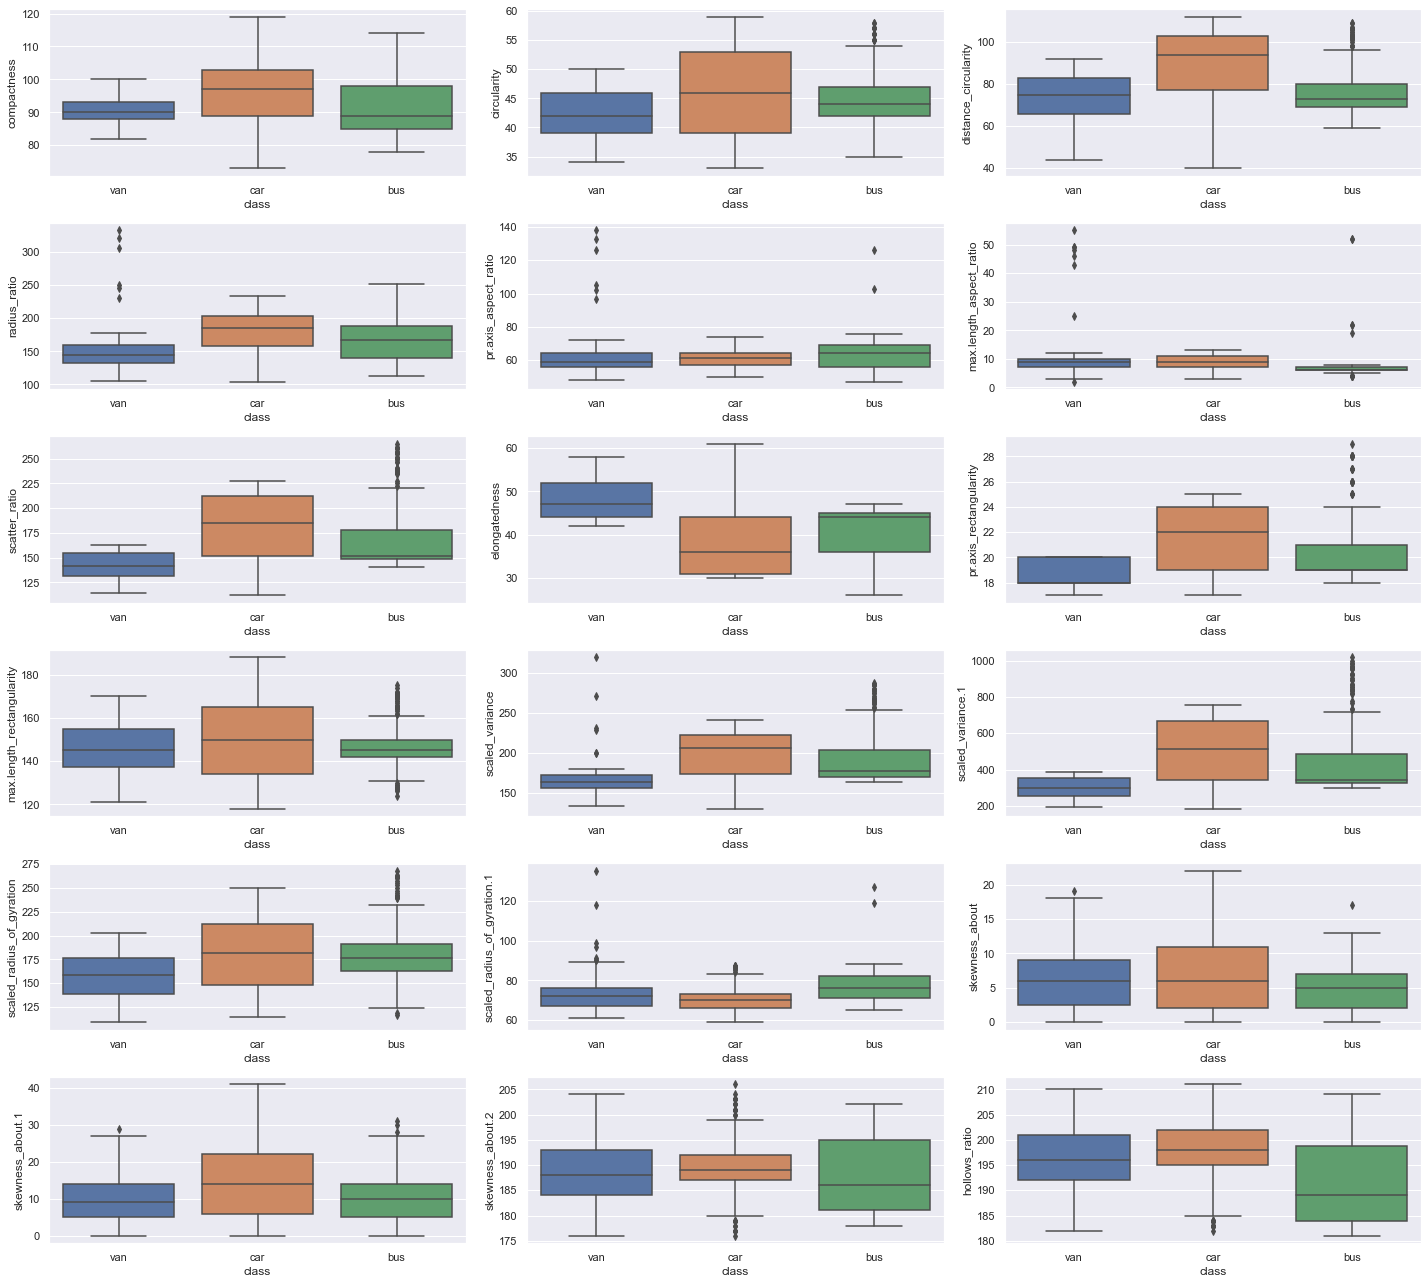

In [58]:
fig,axs = plt.subplots(6,3,figsize=(20,18))
sns.boxplot(x="class", y="compactness",data=df,ax=axs[0,0]);
sns.boxplot(x="class", y="circularity",data=df,ax=axs[0,1]);
sns.boxplot(x="class", y="distance_circularity",data=df,ax=axs[0,2]);
sns.boxplot(x="class", y="radius_ratio",data=df,ax=axs[1,0]);
sns.boxplot(x="class", y="pr.axis_aspect_ratio",data=df,ax=axs[1,1]);
sns.boxplot(x="class", y="max.length_aspect_ratio",data=df,ax=axs[1,2]);
sns.boxplot(x="class", y="scatter_ratio",data=df,ax=axs[2,0]);
sns.boxplot(x="class", y="elongatedness",data=df,ax=axs[2,1]);
sns.boxplot(x="class", y="pr.axis_rectangularity",data=df,ax=axs[2,2]);
sns.boxplot(x="class", y="max.length_rectangularity",data=df,ax=axs[3,0]);
sns.boxplot(x="class", y="scaled_variance",data=df,ax=axs[3,1]);
sns.boxplot(x="class", y="scaled_variance.1",data=df,ax=axs[3,2]);
sns.boxplot(x="class", y="scaled_radius_of_gyration",data=df,ax=axs[4,0]);
sns.boxplot(x="class", y="scaled_radius_of_gyration.1",data=df,ax=axs[4,1]);
sns.boxplot(x="class", y="skewness_about",data=df,ax=axs[4,2]);
sns.boxplot(x="class", y="skewness_about.1",data=df,ax=axs[5,0]);
sns.boxplot(x="class", y="skewness_about.2",data=df,ax=axs[5,1]);
sns.boxplot(x="class", y="hollows_ratio",data=df,ax=axs[5,2]);
fig.tight_layout()

There is significant difference between classes when compared with the mean and median with all the numeric attributes. Most of them have outliers with class bus. Class car has failry normal distribution with almost all features.

In [60]:
columns=['compactness','circularity','distance_circularity','radius_ratio','pr.axis_aspect_ratio','max.length_aspect_ratio','scatter_ratio','elongatedness','pr.axis_rectangularity','max.length_rectangularity','scaled_variance','scaled_variance.1','scaled_radius_of_gyration','scaled_radius_of_gyration.1','skewness_about','skewness_about.1','skewness_about.2','hollows_ratio']
outliers = []
for c in columns:
    Q3 = np.percentile(df[c],75)
    Q1 = np.percentile(df[c],25)
    IQR = Q3 - Q1
    Threshold = IQR*1.5
    uf = Q3 + Threshold
    lf = Q1 - Threshold
    dfwoO = df.loc[(df[c] >= lf) & (df[c] <= uf)]
    mean= dfwoO[c].mean()
    df[c]=np.where(df[c]>uf,mean,df[c])
    df[c]=np.where(df[c]<lf,mean,df[c])
    #checking if there are any outliers remaining
    for i in df[c]:
        if i < lf or i > uf:
           outliers.append(i)
        
print(outliers)

[]


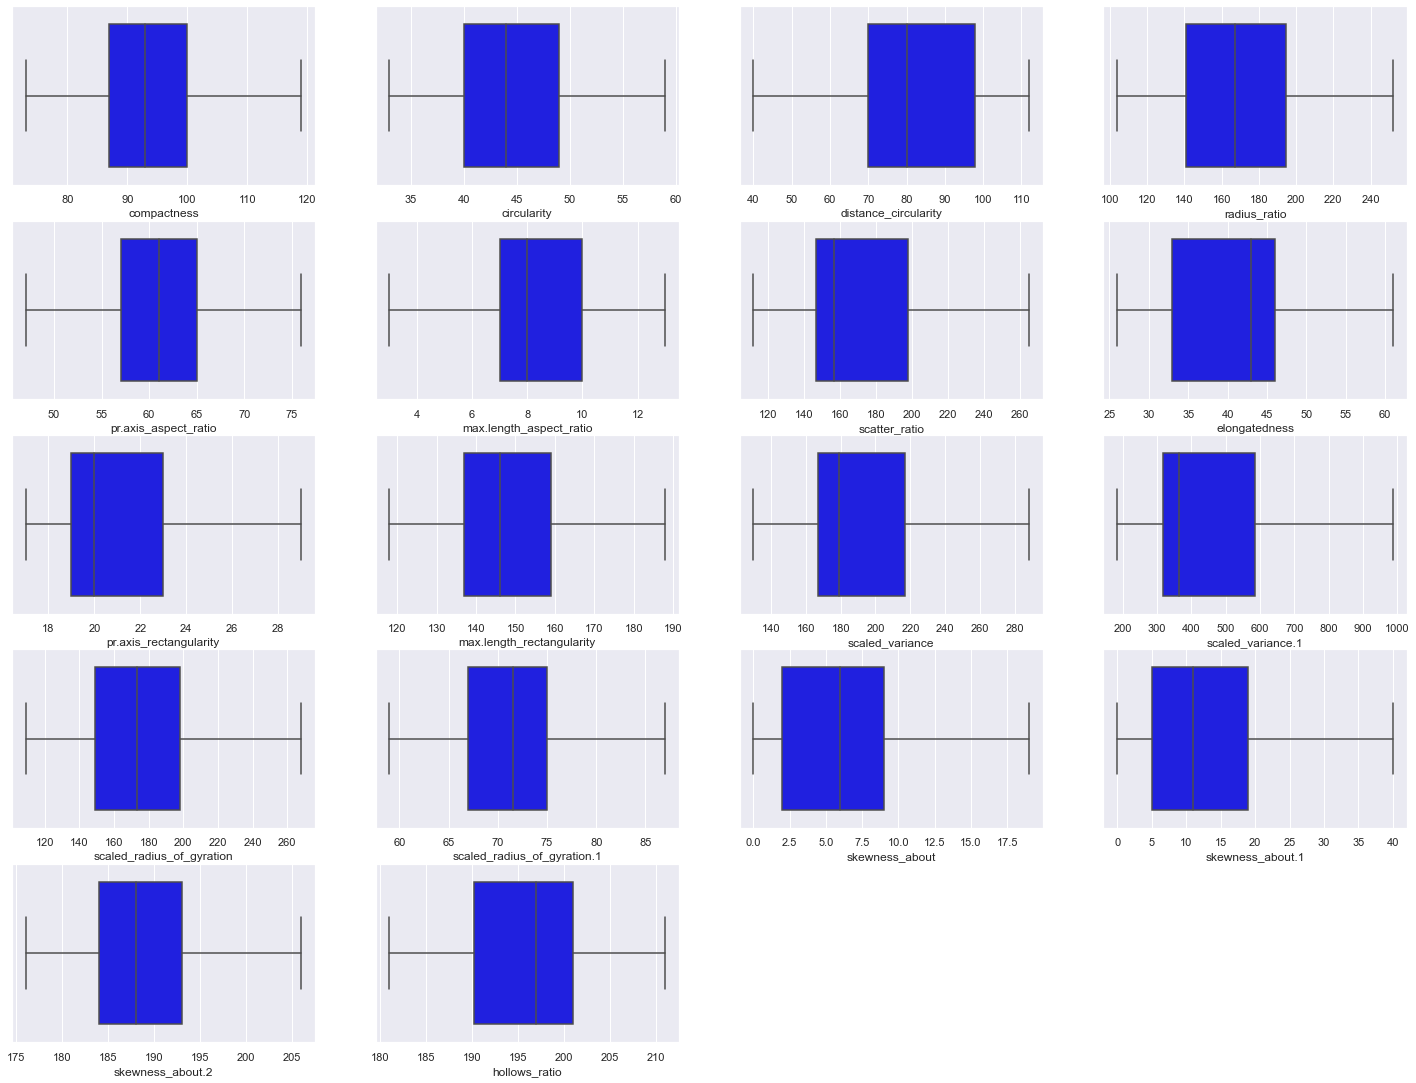

In [61]:
plt.figure(figsize=(25,23))
col = 1
for i in df.drop(columns='class').columns:
    plt.subplot(6, 4, col)
    sns.boxplot(df[i],color='blue')
    col += 1

Now there are no outliers.

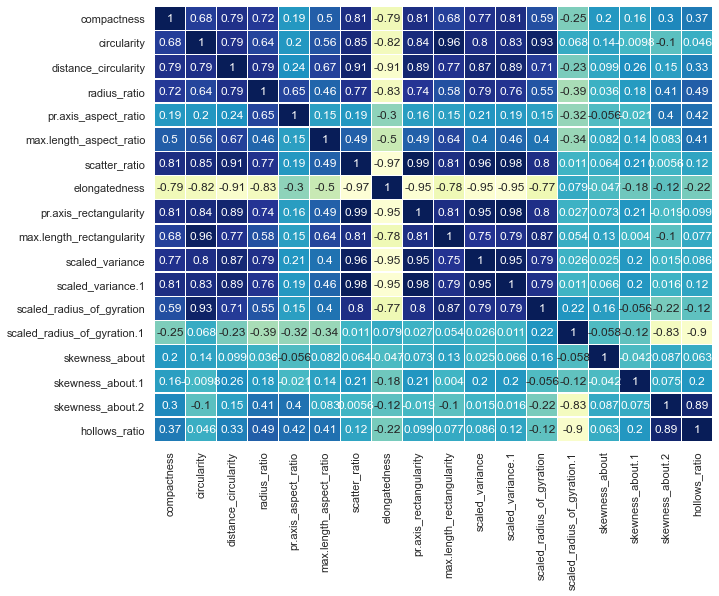

In [63]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

There is some correlation like between scatter_ratio and pr.axis_rectangularity, scatter_ratio and scaled_variance.1, etc. But other are not that correlated to drop features.

In [64]:
X = df.loc[:, df.columns != 'class']
y = df['class'].astype('category').cat.codes

#### Apply scaling 

In [65]:
XScaled=X.apply(zscore)
XScaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.518073,0.057177,0.300798,1.932878,0.911341,-0.207598,0.136262,-0.224342,0.758332,-0.401153,-0.338490,0.285705,-0.317123,-0.032795,0.386961,-0.312012,0.183957
1,-0.325470,-0.623732,0.120741,-0.850816,-0.740862,0.426573,-0.599423,0.520519,-0.610886,-0.344578,-0.594612,-0.619767,-0.513630,0.007821,0.623630,0.161534,0.013265,0.452977
2,1.254193,0.844303,1.519141,1.265665,0.863382,0.911341,1.148719,-1.144597,0.935290,0.689401,1.114283,1.131039,1.392477,0.170292,1.717671,-0.402034,-0.149374,0.049447
3,-0.082445,-0.623732,-0.006386,-0.290571,0.328634,0.426573,-0.750125,0.648605,-0.610886,-0.344578,-0.917045,-0.740314,-1.466683,-1.454424,-0.032795,-0.289320,1.639649,1.529056
4,-1.054545,-0.134387,-0.769150,1.141166,0.000000,0.000000,-0.599423,0.520519,-0.610886,-0.275646,1.694662,-0.648469,0.408680,0.000000,0.623630,-0.176607,-1.450481,-1.699181


#### SVC without PCA 

In [66]:
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size = 0.3, random_state = 10)

In [68]:
X_train.shape

(592, 18)

In [69]:
X_test.shape

(254, 18)

In [70]:
svc_model = SVC(C= 4, kernel='rbf', gamma='scale')
svc_model.fit(X_train, y_train)

SVC(C=4)

In [71]:
sv_train_predict = svc_model .predict(X_train)

In [72]:
metrics.accuracy_score(y_train, sv_train_predict)

0.9898648648648649

In [73]:
sv_test_predict = svc_model .predict(X_test)
metrics.accuracy_score(y_test, sv_test_predict)

0.968503937007874

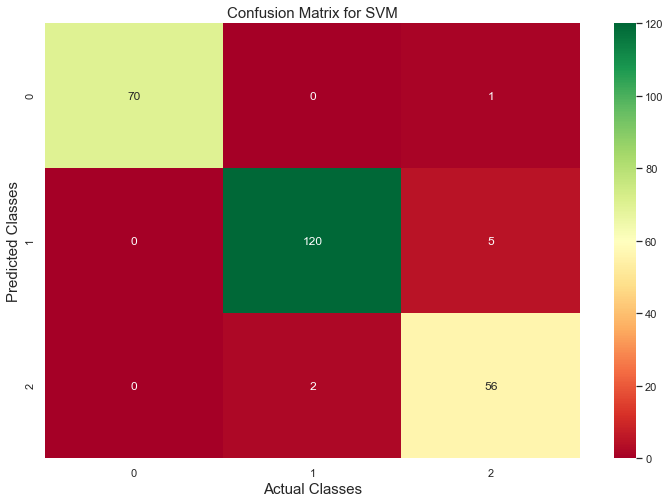

In [74]:
cm= confusion_matrix(y_test, sv_test_predict)
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for SVM', fontsize = 15);

In [75]:
print("Classification Report")
print(metrics.classification_report(y_test, sv_test_predict, labels=[0,1,2]))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        71
           1       0.98      0.96      0.97       125
           2       0.90      0.97      0.93        58

    accuracy                           0.97       254
   macro avg       0.96      0.97      0.97       254
weighted avg       0.97      0.97      0.97       254



In [76]:
precision_SV, recall_SV, f1_score_SV, support = precision_recall_fscore_support(y_test, sv_test_predict,average='macro')
print('Precision Score :', '%0.2f' % precision_SV)
print('Recall Score :', '%0.2f' % recall_SV)
print('F1-Score:', '%0.2f' % f1_score_SV)
SV_Acc= accuracy_score(y_test, sv_test_predict)
print('Accuracy Score :','%0.2f' % SV_Acc)

Precision Score : 0.96
Recall Score : 0.97
F1-Score: 0.97
Accuracy Score : 0.97


#### Applying PCA 

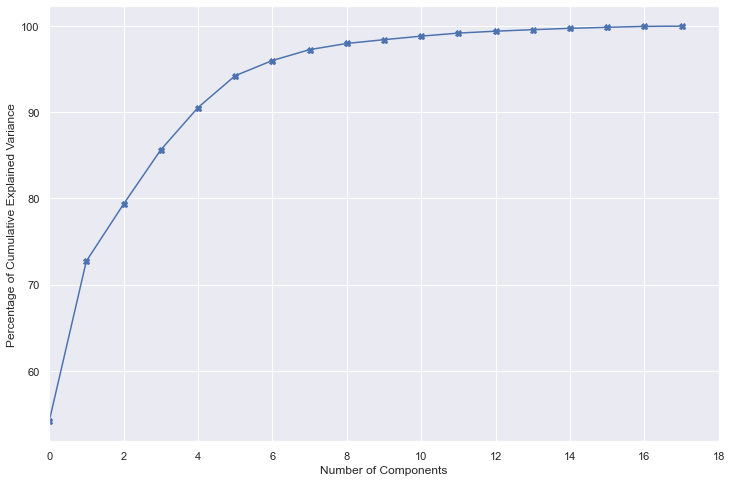

In [78]:
pca = PCA()
X_pca_ = pca.fit_transform(XScaled)
plt.figure(figsize = (12, 8))
plt.plot((np.cumsum(pca.explained_variance_ratio_) * 100), marker = 'X')
plt.xlim(0, 18)
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Cumulative Explained Variance');

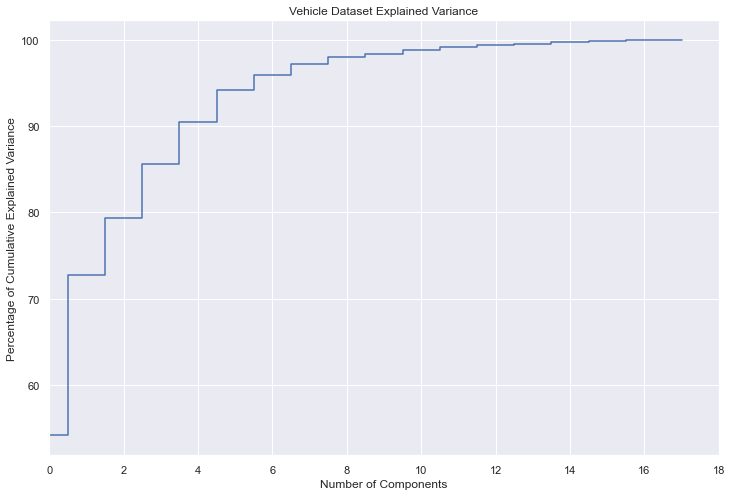

In [80]:
plt.figure(figsize = (12, 8))
plt.step(list(range(18)), (np.cumsum(pca.explained_variance_ratio_) * 100), where = 'mid')
plt.xlim(0, 18)
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Cumulative Explained Variance')
plt.title('Vehicle Dataset Explained Variance');

We can see that first 6 components contributes to almost 95% of variation. Next 11 components contribute to less than 7% of varations. We can drop after 7th component onwards.

In [79]:
pca.explained_variance_

array([9.75309110e+00, 3.35285152e+00, 1.19257609e+00, 1.13412224e+00,
       8.84501402e-01, 6.66878099e-01, 3.17978277e-01, 2.27559894e-01,
       1.29269132e-01, 7.92921999e-02, 7.37341552e-02, 6.41114788e-02,
       3.98397736e-02, 3.15017496e-02, 2.83330529e-02, 2.10181984e-02,
       1.96138596e-02, 5.02955277e-03])

In [81]:
pca3 = PCA(n_components=6)
pca3.fit(XScaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(XScaled)

[[ 0.27245964  0.28722751  0.30235551  0.2696379   0.09774705  0.1949844
   0.31049808 -0.3089503   0.30726733  0.27811774  0.29978744  0.30604227
   0.26323847 -0.04200559  0.03616534  0.05871285  0.03792352  0.08462002]
 [-0.08717791  0.13137733 -0.04636143 -0.19787282 -0.25774054 -0.10819209
   0.075091   -0.01303418  0.08736435  0.12189909  0.0772119   0.07265265
   0.2103698   0.50385492 -0.01609412 -0.09287948 -0.50151274 -0.50757741]
 [-0.03779139 -0.20140391  0.06374512  0.05585762 -0.06324362 -0.14914494
   0.10921576 -0.09090073  0.10629573 -0.21391862  0.14426608  0.11052218
  -0.20310724  0.0735558  -0.55799128  0.67137737 -0.06186343 -0.04135249]
 [ 0.13910656 -0.03784855  0.10868015 -0.25462673 -0.61311858  0.27721729
   0.00543254  0.06522997  0.03096144  0.0414514  -0.06397623 -0.00182016
  -0.08504819 -0.11575274  0.47536111  0.42690191 -0.02711034  0.09575508]
 [ 0.13803227 -0.13898008 -0.08039133  0.13297669  0.12244314 -0.6367432
   0.0856902  -0.079146    0.0818033

In [82]:
pca_6 = PCA(n_components = 6)
X_pca = pca_6.fit_transform(XScaled)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])

Original number of features: 18
Reduced number of features: 6


In [83]:
pca_df = pd.DataFrame(data = X_pca)
pca_df.head()

,0,1,2,3,4,5
0,0.582942,-0.676965,-0.456103,-0.753475,-0.783727,-1.843165
1,-1.513047,-0.349850,-0.331143,1.268455,-0.327186,-0.117328
2,3.912953,0.232968,-1.264693,0.139920,0.912261,-0.690029
3,-1.536518,-3.044950,-0.468228,0.323201,-0.609439,0.372588
4,-0.631525,1.511340,-0.253865,-0.559735,0.442308,-1.062567


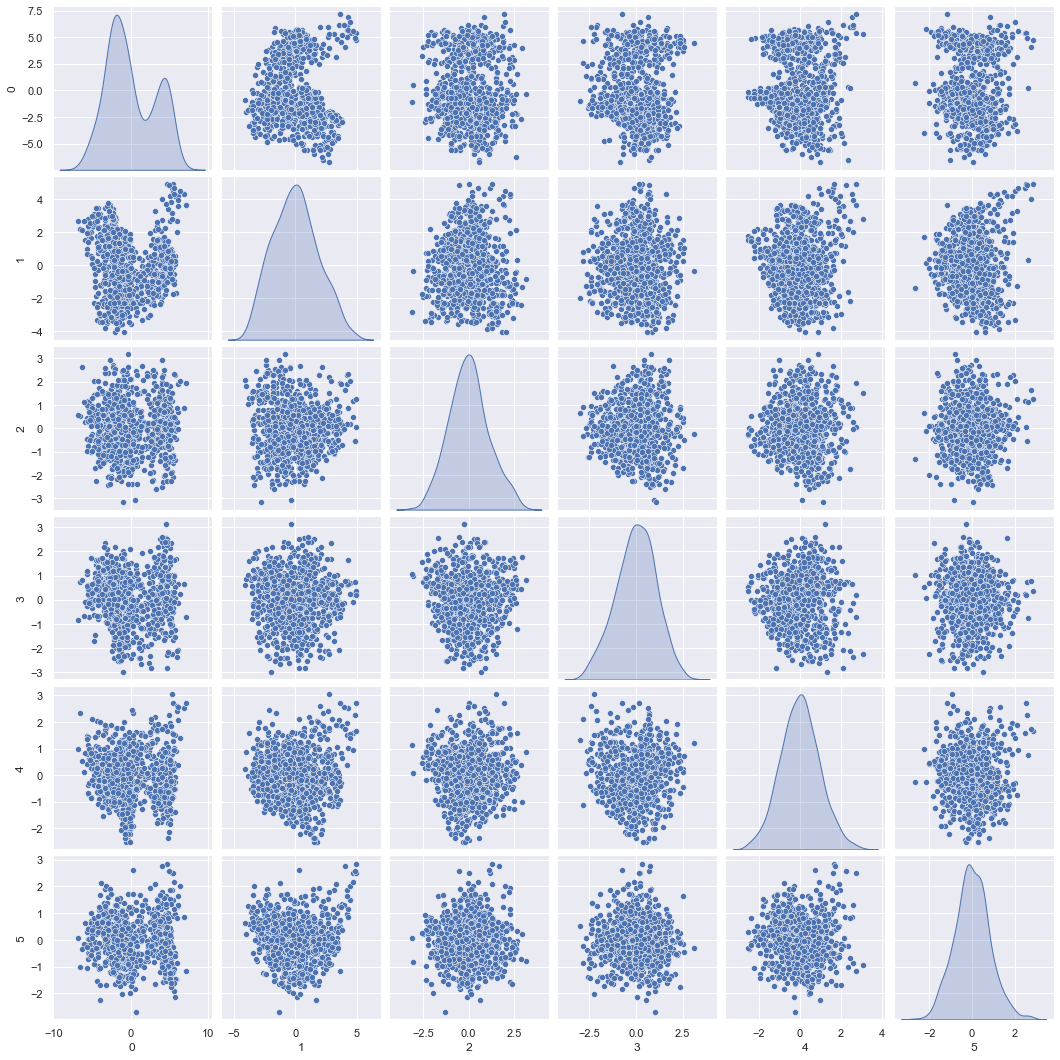

In [84]:
sns.pairplot(pca_df, diag_kind = 'kde');

#### SVC with PCA 

In [85]:
X_tr, X_te, y_tr, y_te = train_test_split(X_pca, y, test_size = 0.3, random_state = 10)

In [86]:
X_tr.shape

(592, 6)

In [87]:
X_te.shape

(254, 6)

In [88]:
svc_model_pca = SVC(C= 4, kernel='rbf', gamma='scale')
svc_model_pca.fit(X_tr, y_tr)

SVC(C=4)

In [89]:
sv_tr_predict = svc_model_pca .predict(X_tr)
metrics.accuracy_score(y_tr, sv_tr_predict)

0.9493243243243243

In [90]:
sv_te_predict = svc_model_pca .predict(X_te)
metrics.accuracy_score(y_te, sv_te_predict)

0.9212598425196851

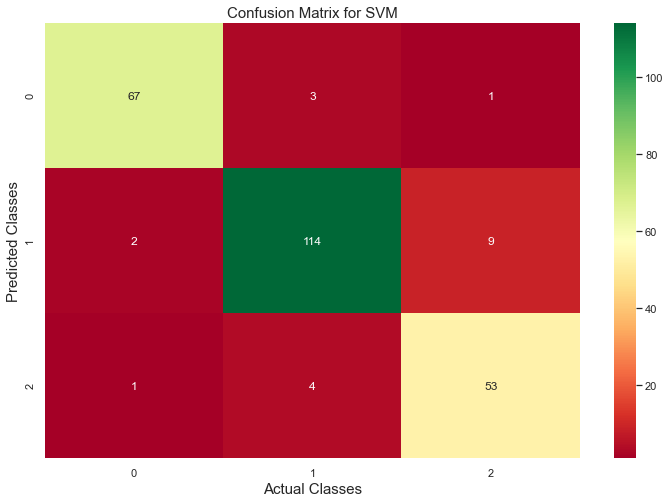

In [91]:
cm= confusion_matrix(y_te, sv_te_predict)
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for SVM', fontsize = 15);

In [92]:
print(metrics.classification_report(y_te, sv_te_predict, labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        71
           1       0.94      0.91      0.93       125
           2       0.84      0.91      0.88        58

    accuracy                           0.92       254
   macro avg       0.91      0.92      0.92       254
weighted avg       0.92      0.92      0.92       254



In [93]:
precision_SV_pca, recall_SV_pca, f1_score_SV_pca, support_pca = precision_recall_fscore_support(y_te, sv_te_predict,average='macro')
print('Precision Score :', '%0.2f' % precision_SV_pca)
print('Recall Score :', '%0.2f' % recall_SV_pca)
print('F1-Score:', '%0.2f' % f1_score_SV_pca)
SV_Acc_pca= accuracy_score(y_te, sv_te_predict)
print('Accuracy Score :','%0.2f' % SV_Acc_pca)

Precision Score : 0.91
Recall Score : 0.92
F1-Score: 0.92
Accuracy Score : 0.92


In [94]:
modellists = []
modellists.append(['Support Vector Classifier without PCA', SV_Acc * 100, recall_SV * 100, precision_SV * 100,f1_score_SV*100])
modellists.append(['Support Vector Classifier with PCA', SV_Acc_pca* 100, recall_SV_pca * 100, precision_SV_pca * 100,f1_score_SV_pca*100])
mdl_df = pd.DataFrame(modellists, columns = ['Model','Accuracy Score of Test Data', 'Recall Score', 'Precision Score','F1 Score'])
mdl_df

,Model,Accuracy Score of Test Data,Recall Score,Precision Score,F1 Score
0,Support Vector Classifier without PCA,96.850394,97.047758,96.227745,96.596702
1,Support Vector Classifier with PCA,92.125984,92.315169,91.352049,91.773898


Although SVC without PCA shows better accuracy than with PCA. Recall, precision, F1 score is also better for SVC without PCA. But SVC with PCA have 92% of accuracy with only 6 features. We dropped other features which showed only about 5% of variance of total dataset. So we can say SVC with PCA performed better in overall sense.